# <span style = "color: white "> Employee attrition Classification </span>
## By Saravana Perumal R.

***

The issue of keeping one's employees happy and satisfied is a perennial and age-old challenge. If an employee you have invested so much time and money leaves for "greener pastures", then this would mean that you would have to spend even more time and money to hire somebody else. In the spirit of Kaggle, let us therefore turn to our predictive modelling capabilities and see if we can predict employee attrition on this synthetically generated IBM dataset.

### Let's Dive into it

#### Import necessary libraries

In [2]:
# importing libraries necessary for the data preprocessing

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Read 'HR-Employee-Attrition.csv' dataset and store it inside a variable

In [3]:
# Reading the CSV file obtained from the Kaggle website 
df = pd.read_csv('HR-Employee-Attrition.csv') 

### Check head

In [4]:
#Since the DataFrame is having a lot of columns, by default the program does not show all the columns, 
# the following code enables us to view all the columns in the DataFrame 
pd.set_option("display.max_columns", None)

In [5]:
# The code enabes us to view first 5 Rows of the dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Check last 5 rows

In [6]:
# The code enabes us to view last 5 Rows of the dataframe
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


### Check shape

In [7]:
# Let's view the number of columns and rows 
df.shape

(1470, 35)

### View info about the dataset

In [8]:
# To 
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### View basic statistical information about the dataset

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Check for null values

In [10]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### View unique values in all categorical columns

In [11]:

catcol=[]
for i in df.columns:
    if df[i].dtype == object:
        catcol.append(i)
        

In [12]:
for i in catcol:
    print (f'Unique values in {i} is {df[i].unique()}')

Unique values in Attrition is ['Yes' 'No']
Unique values in BusinessTravel is ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in Department is ['Sales' 'Research & Development' 'Human Resources']
Unique values in EducationField is ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in Gender is ['Female' 'Male']
Unique values in JobRole is ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in MaritalStatus is ['Single' 'Married' 'Divorced']
Unique values in Over18 is ['Y']
Unique values in OverTime is ['Yes' 'No']


### Check the number of unique values in all columns

In [13]:
for i in df.columns:
    print (f'number of elements in {i} are : {df[i].nunique()}')


number of elements in Age are : 43
number of elements in Attrition are : 2
number of elements in BusinessTravel are : 3
number of elements in DailyRate are : 886
number of elements in Department are : 3
number of elements in DistanceFromHome are : 29
number of elements in Education are : 5
number of elements in EducationField are : 6
number of elements in EmployeeCount are : 1
number of elements in EmployeeNumber are : 1470
number of elements in EnvironmentSatisfaction are : 4
number of elements in Gender are : 2
number of elements in HourlyRate are : 71
number of elements in JobInvolvement are : 4
number of elements in JobLevel are : 5
number of elements in JobRole are : 9
number of elements in JobSatisfaction are : 4
number of elements in MaritalStatus are : 3
number of elements in MonthlyIncome are : 1349
number of elements in MonthlyRate are : 1427
number of elements in NumCompaniesWorked are : 10
number of elements in Over18 are : 1
number of elements in OverTime are : 2
number of

### Print out the names of the columns having only one unique values 

In [14]:
for i in df.columns:
    if df[i].nunique() == 1:
        print( i )

EmployeeCount
Over18
StandardHours


### Drop these columns as they won't be useful in our predicition

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [16]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:
df= df.drop(columns = ['EmployeeCount'])

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Drop EmployeeNumber column aswell

In [19]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Create following groupby valuecounts

In [20]:
df.groupby('Department')['EducationField', 'Gender'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_1368\784997095.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Department')['EducationField', 'Gender'].value_counts()


Department              EducationField    Gender
Human Resources         Human Resources   Male       19
                        Medical           Male       11
                        Life Sciences     Female      9
                        Human Resources   Female      8
                        Life Sciences     Male        7
                        Technical Degree  Male        3
                        Other             Male        3
                        Medical           Female      2
                        Technical Degree  Female      1
Research & Development  Life Sciences     Male      274
                        Medical           Male      211
                        Life Sciences     Female    166
                        Medical           Female    152
                        Technical Degree  Male       58
                        Other             Male       39
                        Technical Degree  Female     36
                        Other             Female     25

# <span style = "color: orange"> Data Visualization </span>

### Plot the following

<Axes: xlabel='Attrition', ylabel='count'>

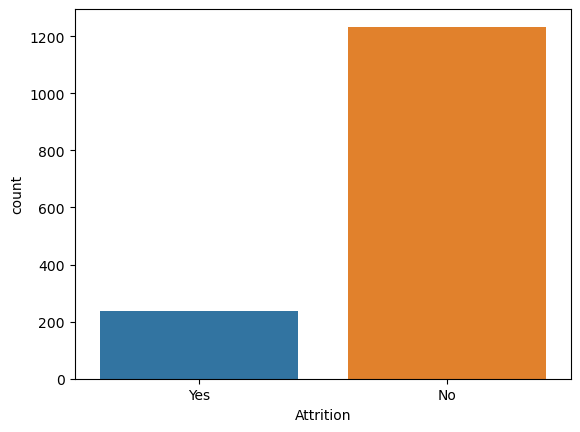

In [21]:
sns.countplot(x = df['Attrition'])

<Axes: xlabel='Attrition', ylabel='count'>

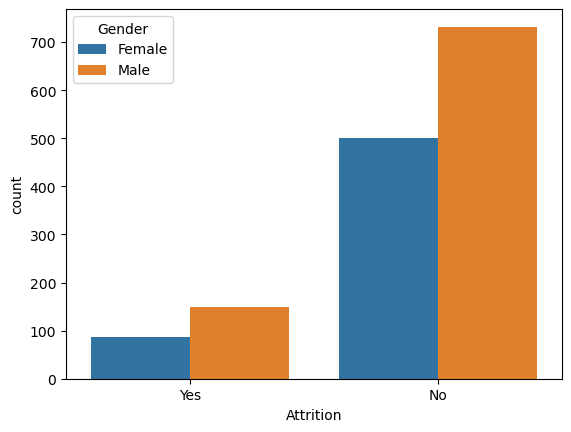

In [22]:
sns.countplot(x = df['Attrition'], hue =df['Gender'] )

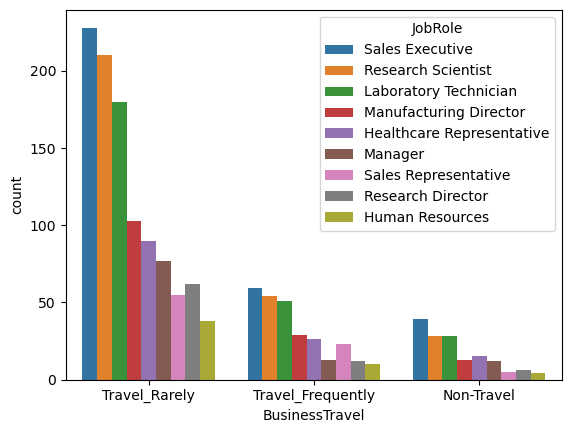

In [23]:
sns.countplot ( data = df , x = 'BusinessTravel', hue = 'JobRole')
plt.show()

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

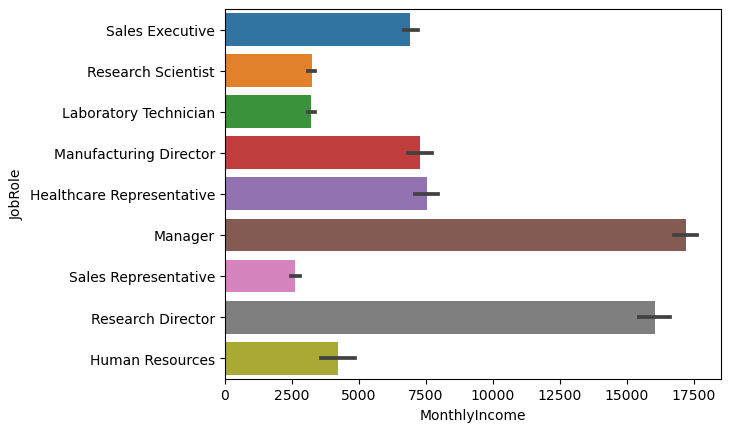

In [91]:
sns.barplot(x = df['MonthlyIncome'], y = df['JobRole'])

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

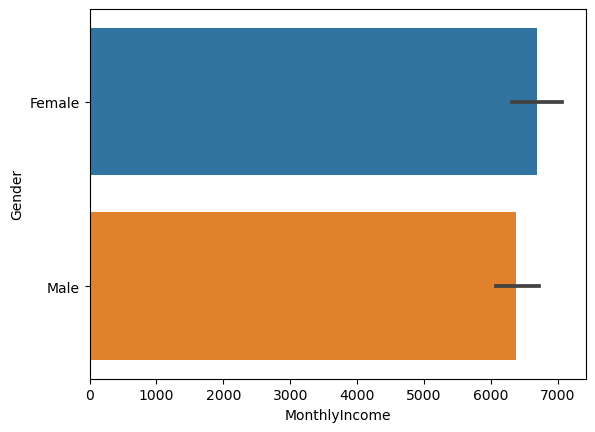

In [92]:
sns.barplot(x = df['MonthlyIncome'], y = df['Gender'])

<Axes: xlabel='MonthlyIncome', ylabel='EducationField'>

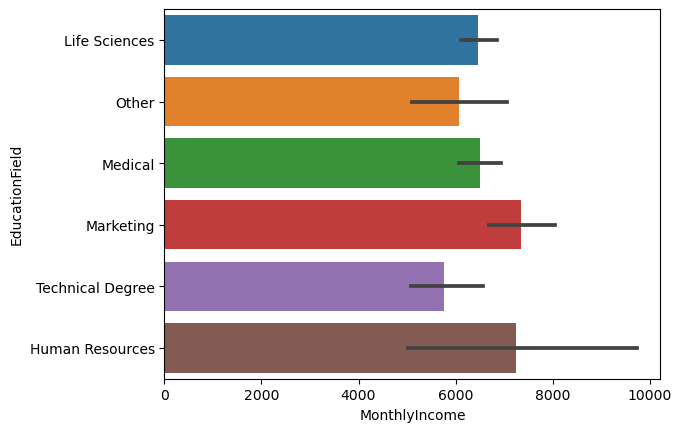

In [26]:
sns.barplot(x = df['MonthlyIncome'], y = df['EducationField'])

<Axes: xlabel='JobSatisfaction', ylabel='count'>

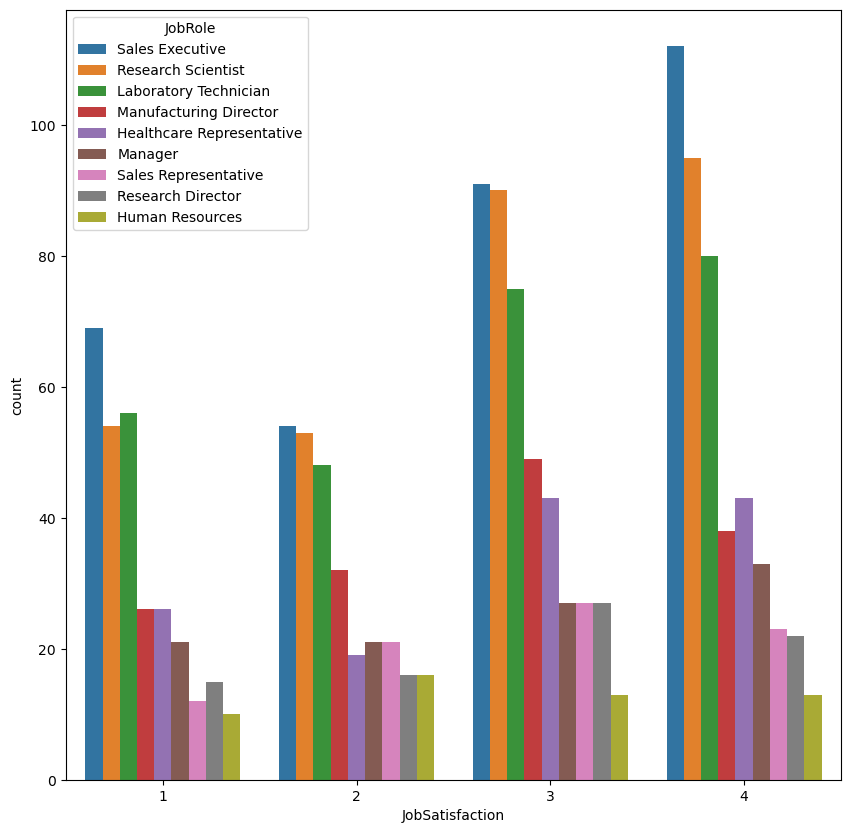

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(x =df ['JobSatisfaction'] , hue = df['JobRole'])

<Axes: xlabel='Age', ylabel='Count'>

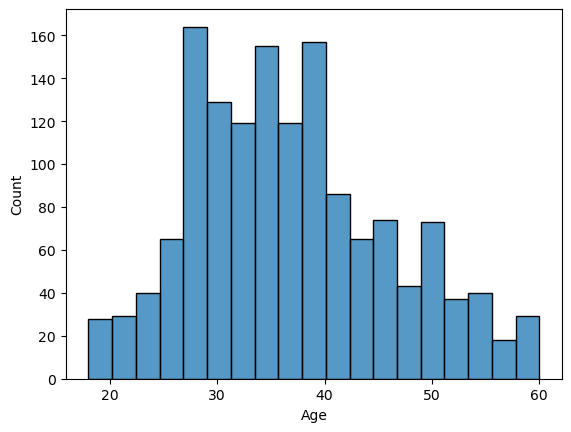

In [28]:
sns.histplot(df['Age'])

### Data Preprocessing

#### Convert Attrition from ('Yes', 'No') to (1,0) 

In [29]:
df['Attrition'] = df['Attrition'].replace(['Yes', 'No'], [1, 0])
  
       

In [30]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Convert the rest of the categorical values into numeric using dummy variables and store the results in a new dataframe called 'newdf'

In [31]:
newdf = pd.get_dummies(df)
newdf.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


#### Check the shape of our new dataset

In [32]:
newdf.shape

(1470, 55)

#### Print unique values in our new dataframe

In [33]:
for i in df.columns:
    print (f' Unique values in {i} are : {df[i].unique()}')

 Unique values in Age are : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
 Unique values in Attrition are : [1 0]
 Unique values in BusinessTravel are : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
 Unique values in DailyRate are : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1

#### Split the columns into input and target variables (X and y)

In [34]:
x = newdf.drop(columns='Attrition')
y = newdf['Attrition']

In [35]:
x.shape

(1470, 54)

In [36]:
y.shape

(1470,)

#### Carry out Feature scaling using StandardScaler

In [ ]:
# This is done by subtracting the mean of each feature and then dividing by its standard deviation.

In [37]:
from sklearn.preprocessing import StandardScaler


In [38]:
scaler = StandardScaler()


In [39]:
scaledx = scaler.fit_transform(x)


In [40]:
x = pd.DataFrame(scaledx,columns = x.columns)


In [41]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-1.701283,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.3371,-0.481859,0.639841,-0.211604,-1.374051,1.515244,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,0.0,-1.591746,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,0.628241,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,-1.696298,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,0.0,-1.591746,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,-1.694636,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,-1.591746,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,0.628241,-0.628241


### Split the dataset into training and testing set

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state = 100)

## Machine Learning Models

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [45]:
model = LogisticRegression()

In [46]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [47]:
model.score(xtrain,ytrain)

0.901846452866861

In [48]:
ypred = model.predict(xtest)
ypred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [49]:
print("Accuracy score of our model is : ", metrics.accuracy_score(ytest,ypred))

print("Confusion matrix is : ", '\n' , metrics.confusion_matrix(ytest,ypred))

print("Classification report is : ", '\n', metrics.classification_report(ytest,ypred))

print("Cross Validation Score is: ", cross_val_score(LogisticRegression(), x, y, cv = 2).mean())

Accuracy score of our model is :  0.873015873015873
Confusion matrix is :  
 [[352  19]
 [ 37  33]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       371
           1       0.63      0.47      0.54        70

    accuracy                           0.87       441
   macro avg       0.77      0.71      0.73       441
weighted avg       0.86      0.87      0.87       441

Cross Validation Score is:  0.8605442176870748


<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

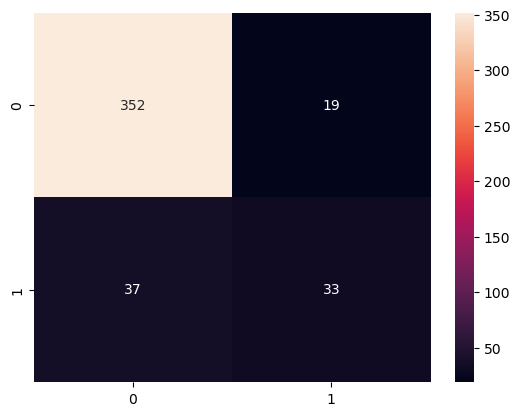

In [50]:
sns.heatmap(metrics.confusion_matrix(ytest,ypred), annot = True, fmt = 'd')
#fmt='d': specifies the format of the numerical annotations. Here, 'd' means integers, so each cell will show an integer count.


### Random Forest Classifier
** Choose the best estimator and parameters :GridSearchCV**

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # Cross validation -  find the best hyperparameters for a model.

In [93]:
'''ensemble module, which includes ensemble learning methods, such as Random Forest, AdaBoost, and Gradient Boosting.'''

'ensemble module, which includes ensemble learning methods, such as Random Forest, AdaBoost, and Gradient Boosting.'

In [52]:
rfcmodel = RandomForestClassifier()

In [53]:
rfcmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [54]:
rfcypred = rfcmodel.predict(xtest) 

<span style = "color:blue"> Create Random forest model with the best parameters </span>

In [55]:
params = {'max_depth': list(range(10, 15)), 'n_estimators' : list(range(1,20)), 'random_state': list(range(10, 15))}

gsv = GridSearchCV(RandomForestClassifier(), params, cv = 5, n_jobs = -1, scoring='accuracy')

gsv.fit(xtrain, ytrain)
# Max_depth =  The depth of a tree is the maximum number of levels between the root node and the leaf nodes
# n estimator = This parameter defines the number of trees in the forest, 
'''
Hyperparameters in machine learning models are given in a range during hyperparameter tuning or grid search because 
it's necessary to explore different combinations of hyperparameter values to find the best set of parameters for the 
specific problem and dataset. The concept of tuning hyperparameters is about finding the best model performance by 
experimenting with different hyperparameter values, not just choosing a single optimal value.'''


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                         'random_state': [10, 11, 12, 13, 14]},
             scoring='accuracy')

In [56]:
print("Best estimator is: ", gsv.best_estimator_)
print("Best parameters are: ", gsv.best_params_)
print("Best score is: ", gsv.best_score_)

Best estimator is:  RandomForestClassifier(max_depth=10, n_estimators=8, random_state=14)
Best parameters are:  {'max_depth': 10, 'n_estimators': 8, 'random_state': 14}
Best score is:  0.8678332938669193


In [57]:
ypred = gsv.best_estimator_.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [58]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=20)

In [59]:
print("Accuracy score of our model is : ", metrics.accuracy_score(ytest,ypred))

print("Confusion matrix is : ", '\n' , metrics.confusion_matrix(ytest,ypred))

print("Classification report is : ", '\n', metrics.classification_report(ytest,ypred))

print("Cross Validation Score is: ", cross_val_score(RandomForestClassifier(), x, y, cv = 2))
#Precision (also called Positive Predictive Value) is the ratio of true positive predictions to the total number of predicted positive values (true positive + false positive).
#Recall (also called Sensitivity or True Positive Rate) is the ratio of true positive predictions to the total number of actual positive values (true positive + false negative). 
#F1-score is the harmonic mean of precision and recall. It is calculated as 2 * (precision * recall) / (precision + recall).


Accuracy score of our model is :  0.8526077097505669
Confusion matrix is :  
 [[360  11]
 [ 54  16]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       371
           1       0.59      0.23      0.33        70

    accuracy                           0.85       441
   macro avg       0.73      0.60      0.62       441
weighted avg       0.83      0.85      0.82       441

Cross Validation Score is:  [0.85714286 0.86258503]


<Axes: >

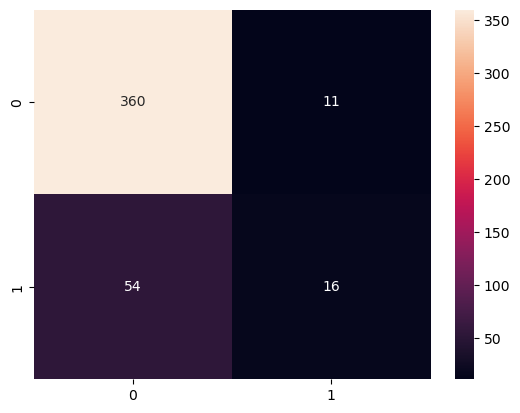

In [60]:
sns.heatmap(metrics.confusion_matrix(ytest,ypred), annot = True, fmt = 'd')

<span style = "color:orange"> Visualize confusion matrix </span>

### Support Vector Machine

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [62]:
svm = SVC()

In [63]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 1, 'scale', 'auto'],
    'degree' : [1,2,3,4,5]
}

In [64]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [1, 2, 3, 4, 5],
                         'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [65]:
print("Best estimator is: ", grid_search.best_estimator_)
print("Best parameters are: ", grid_search.best_params_)
print("Best score is: ", grid_search.best_score_)

Best estimator is:  SVC(C=10, degree=1, gamma=0.1, kernel='linear')
Best parameters are:  {'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best score is:  0.8775704475491356


<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

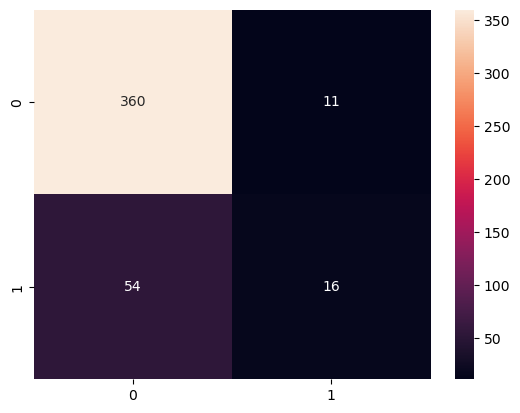

In [66]:
sns.heatmap(metrics.confusion_matrix(ytest,ypred), annot = True, fmt = 'd')


### AdaBoost: Classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)

In [69]:
ada_boost.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=42)

In [70]:
print("Accuracy score of our model is : ", metrics.accuracy_score(ytest,ypred))

print("Confusion matrix is : ", '\n' , metrics.confusion_matrix(ytest,ypred))

print("Classification report is : ", '\n', metrics.classification_report(ytest,ypred))

print("Cross Validation Score is: ", cross_val_score(AdaBoostClassifier(), x, y, cv = 2))

Accuracy score of our model is :  0.8526077097505669
Confusion matrix is :  
 [[360  11]
 [ 54  16]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       371
           1       0.59      0.23      0.33        70

    accuracy                           0.85       441
   macro avg       0.73      0.60      0.62       441
weighted avg       0.83      0.85      0.82       441

Cross Validation Score is:  [0.83673469 0.85714286]


<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

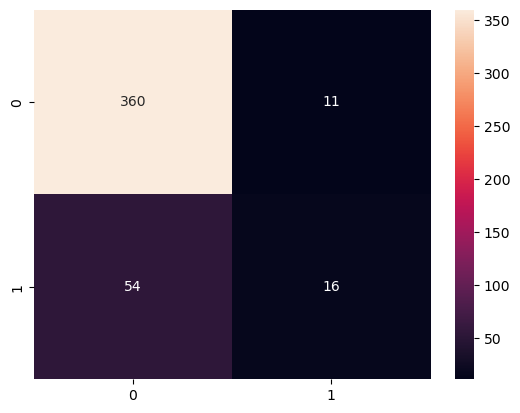

In [71]:
sns.heatmap(metrics.confusion_matrix(ytest,ypred), annot = True, fmt = 'd')


### View score of different models in one dataframe

In [97]:
data = {
    'Models' : ['Logistic Regression', 'Random Forest Classifier', 'Support Vector Classifier',  'AdaBoost: Classifier'],
    'Score' : [0.9008746355685131,0.9776482021379981,0.924198250728863, 0.8526077097505669]
}

In [98]:
model_df = pd.DataFrame(data)
model_df

,Models,Score
0,Logistic Regression,0.900875
1,Random Forest Classifier,0.977648
2,Support Vector Classifier,0.924198
3,AdaBoost: Classifier,0.852608


In [99]:
model_df = model_df.sort_values(by='Score', ascending=False)
model_df

,Models,Score
1,Random Forest Classifier,0.977648
2,Support Vector Classifier,0.924198
0,Logistic Regression,0.900875
3,AdaBoost: Classifier,0.852608


## Use PCA to reduce dimensionality of the data

#### Import PCA and fit our X_train

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components = 0.95)
pca

PCA(n_components=0.95)

In [77]:
x_pca = pca.fit_transform(xtrain)
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,5.221297,2.444697,-1.046058,-1.241562,-1.109570,1.505475,-2.363204,0.730076,2.856128,0.831376,3.917732,0.717677,-0.437001,-1.772940,-1.034781,0.363523,0.314618,1.017733,-0.968159,-0.420817,-1.604324,-1.315877,-0.653503,1.095991,0.051740,-0.644235,0.487300,0.519875,0.889211,-0.169036,0.387614,0.144260,0.432168,-0.054160
1,1.694822,-1.413375,-0.695118,2.203104,0.344110,-2.743933,-0.667367,0.307099,-1.322879,-0.782854,0.075826,1.194203,2.471878,2.513525,-1.679330,-1.650101,-0.554262,-0.978631,-0.587179,0.009145,-0.857970,0.702824,0.915262,2.667824,-0.585325,1.027259,0.037311,-0.295296,0.069271,0.629245,0.014304,-0.587470,0.106843,-1.300013
2,-0.658715,2.429345,-0.749924,-0.597451,0.437794,-2.324022,1.496550,-0.532785,-1.175050,1.082224,0.212836,-0.376614,-1.210341,1.450940,0.870892,-0.035245,-0.054011,-0.593211,1.080676,0.367351,-1.447852,0.656397,-0.119824,0.301359,0.229017,-0.290981,-0.961349,0.337705,-0.295768,1.417832,-0.285479,1.014065,-1.127460,1.131978
3,-0.971766,-1.214252,-0.123231,2.575108,-0.250425,1.101553,0.570883,-0.894085,-0.120665,-1.230086,2.256917,-1.896185,0.231380,-0.427680,0.199140,-0.240401,0.316033,2.248196,0.011284,1.394859,-0.730130,0.885343,-0.110519,-0.141008,0.993524,0.683023,-0.765796,-0.952232,-1.080417,1.404908,-0.009676,-1.141810,-0.200730,-0.545829
4,-2.036748,-1.068575,0.083020,-1.497556,-1.048842,-0.203513,0.210648,-1.375634,0.279660,-1.271042,-0.542978,-2.302913,0.327713,-0.472449,-1.128297,-0.619293,1.450334,0.023007,0.151588,0.870768,-0.760959,-1.762564,-0.375861,0.656594,0.028157,-1.014523,-0.506329,-0.073521,0.671733,-1.199762,0.407006,-0.403594,-0.501184,-0.011011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,-0.905966,2.551666,-0.912561,0.138450,0.150495,1.372597,-1.746838,1.226366,-1.282395,-1.247453,-1.045055,-0.622387,-0.450462,0.567643,0.162064,1.308513,0.004148,-0.316953,-0.346903,0.302420,-0.056303,0.239123,-0.298022,-0.508613,-1.591907,-1.108786,0.051026,1.098279,0.598200,-0.343615,-1.381704,-1.293510,-1.298109,-0.398013
1025,-0.159440,-1.124882,0.395234,0.482442,0.006400,1.816700,1.898813,0.623266,-0.337771,1.933228,-2.078156,-0.356880,-0.461886,0.610597,-0.226109,-2.577966,-1.254517,2.492640,0.488385,-1.365599,0.669837,-2.056342,-0.850960,0.682608,-0.831712,-0.509862,-0.073872,-1.173450,1.220183,-1.482698,-0.734795,0.123655,-0.150755,0.279816
1026,-2.248577,1.951066,5.902979,1.309884,0.512332,0.364747,0.678261,-2.121612,0.593778,1.368674,0.824755,0.427138,3.596823,0.342776,-0.075409,-0.817722,0.737058,0.335519,0.294285,0.402170,-1.216067,1.082206,0.605567,-0.685403,-0.775558,-0.212761,1.708533,0.418140,0.506917,-1.783184,0.142919,0.777186,-0.602638,-2.019298
1027,-0.625656,0.906788,6.075419,1.626156,0.106593,-0.370168,1.475026,1.989548,2.515432,2.245373,1.941128,0.093520,-0.152208,-1.348865,-0.591623,-0.527289,-0.348770,0.548658,-1.508985,-1.057766,-2.086038,0.436140,0.437988,0.086704,-0.462850,-0.729375,-0.336084,-0.003091,0.004045,-0.108135,0.533414,1.442195,-0.815917,-1.605638


#### Apply the mapping (transform) to both the training set and the test set.

In [78]:
train_X = pca.transform(xtrain)
test_X = pca.transform(xtest)

#### Import machine learning model of our choice, we are going with RandomForest for this problem

In [79]:
from sklearn.ensemble import RandomForestClassifier

#### Create RandomForest model with the best parameter we got earlier and train it

In [80]:
best_params = { 'max_depth' : 10, 'n_estimators' : 32, 'n_jobs' : 1, 'random_state' : 20
    
}

In [81]:
rf = RandomForestClassifier(**best_params)

In [82]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=20)

#### Check the score of our model

In [83]:
rf.score(xtrain,ytrain)

0.9844509232264335

#### Make predictions with X_test and check the accuracy score

In [84]:
ypred = rf.predict (xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Print Confusion matrix and Classification report

In [85]:
metrics.accuracy_score(ytest, ypred)

0.8503401360544217

In [86]:
metrics.confusion_matrix(ytest,ypred)

array([[365,   6],
       [ 60,  10]], dtype=int64)

In [87]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       371
           1       0.62      0.14      0.23        70

    accuracy                           0.85       441
   macro avg       0.74      0.56      0.57       441
weighted avg       0.82      0.85      0.81       441



***